In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('diabetes.csv')
print(df.info())
print(df.shape)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: []
Numerical Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [55]:
df[cat_cols].nunique()

Series([], dtype: float64)

In [56]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


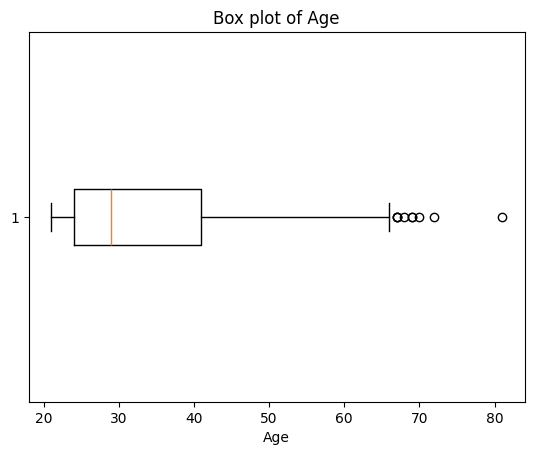

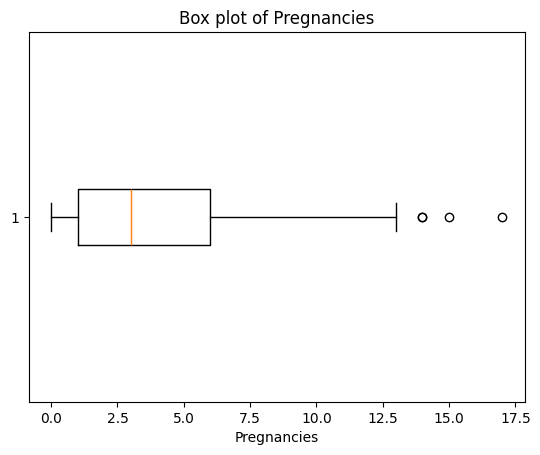

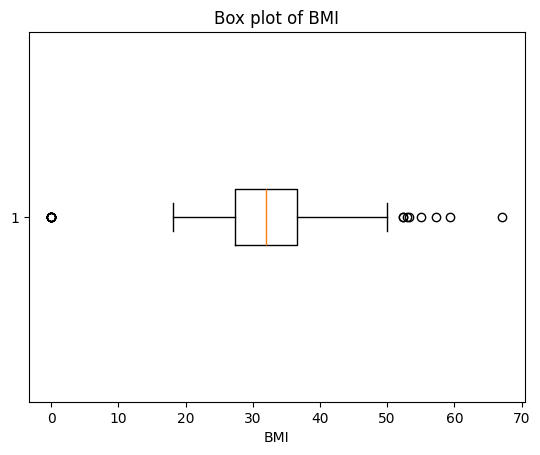

In [58]:
import matplotlib.pyplot as plt

plt.boxplot(df['Age'], vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()

plt.boxplot(df['Pregnancies'], vert=False)
plt.title('Box plot of Pregnancies')
plt.xlabel('Pregnancies')
plt.show()

plt.boxplot(df['BMI'], vert=False)
plt.title('Box plot of BMI')
plt.xlabel('BMI')
plt.show()

In [59]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(outliers.shape)

mean_pregnancies = df['Pregnancies'].mean()
std_pregnancies = df['Pregnancies'].std()

pregnancys_lower_bound = mean_pregnancies - 2 * std_pregnancies
pregnancys_upper_bound = mean_pregnancies + 2 * std_pregnancies

outliers_pregnancies = df[(df['Pregnancies'] < pregnancys_lower_bound) | (df['Pregnancies'] > pregnancys_upper_bound)]
print(outliers_pregnancies.shape)

BMI_mean = df['BMI'].mean()
BMI_std = df['BMI'].std()

BMI_lower_bound = BMI_mean - 2 * BMI_std
BMI_upper_bound = BMI_mean + 2 * BMI_std

outliers_BMI = df[(df['BMI'] < BMI_lower_bound) | (df['BMI'] > BMI_upper_bound)]
print(outliers_BMI.shape)


(47, 9)
(34, 9)
(27, 9)


In [60]:
df_processed = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound) &
                  (df['Pregnancies'] >= pregnancys_lower_bound) & (df['Pregnancies'] <= pregnancys_upper_bound) &
                  (df['BMI'] >= BMI_lower_bound) & (df['BMI'] <= BMI_upper_bound)]
print(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 665 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               665 non-null    int64  
 1   Glucose                   665 non-null    int64  
 2   BloodPressure             665 non-null    int64  
 3   SkinThickness             665 non-null    int64  
 4   Insulin                   665 non-null    int64  
 5   BMI                       665 non-null    float64
 6   DiabetesPedigreeFunction  665 non-null    float64
 7   Age                       665 non-null    int64  
 8   Outcome                   665 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.0 KB
None


In [61]:
X = df_processed.drop(columns=['Outcome'])
y = df_processed['Outcome']
print(X.shape, y.shape)
print(X.head())
print(y.head())

(665, 8) (665,)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.743719,0.590164,0.583333,0.000000,0.538462,0.243892,0.828571
1,0.1,0.427136,0.540984,0.483333,0.000000,0.293706,0.121279,0.285714
2,0.8,0.919598,0.524590,0.000000,0.000000,0.178322,0.263883,0.314286
3,0.1,0.447236,0.540984,0.383333,0.126344,0.346154,0.039538,0.000000
4,0.0,0.688442,0.327869,0.583333,0.225806,0.870629,0.981786,0.342857


In [63]:
X.to_csv('X_diabetes_processed.csv', index=False)
y.to_csv('y_diabetes_processed.csv', index=False)

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']